# Computer vision with PyTorch

#0.Computer vision libaries in PyTorch

* `torchvision` - base domain library for PyTorch computer vision
* `torchvision.datasets` - get the datasets and data loading functions for computer vision here
* `torchvision.models` -get pretrained computer vision models that you can leverage for your own problems.
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable foe use with ML Model.
* `torch.utils.data.Dataset` - Base dataset class for PyTorch.
* `torch.utils.data.DataLoader` - Creates a python iterable over the datasets

In [3]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import models
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check version
print(torch.__version__)
print(torchvision.__version__)

2.5.1+cu124
0.20.1+cu124


# 1.Getting a Dataset

In [4]:
# Setup training data
from torchvision import datasets
train_data=datasets.FashionMNIST(
    root="data", # where to download the data
    train=True, # specificy training data
    download=True, # yes we want to download
    transform=torchvision.transforms.ToTensor(), # Transform the data (images to tensors)
    target_transform=None # Dont transform the labels (y)
)

test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 11.9MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 199kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.71MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 10.9MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [5]:
len(train_data),len(test_data)

(60000, 10000)

In [6]:
# See the first training example
image,label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [7]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [9]:
torch.unique(train_data.targets)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# 1.1 Shape of our image tensor

In [10]:
# Check the shape of our image
print(f"Image shape : {image.shape} c,h,w")
print(f"Image label : {class_names[label]}")

Image shape : torch.Size([1, 28, 28]) c,h,w
Image label : Ankle boot


# 1.2 Visualizing our data

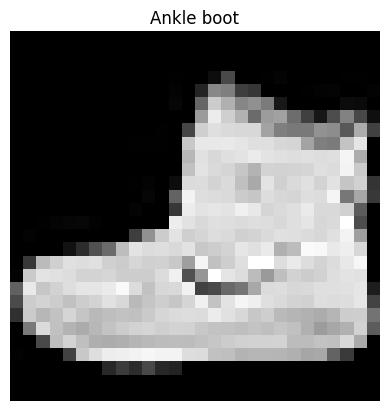

In [11]:
import matplotlib.pyplot as plt
image,label=train_data[0]
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False);

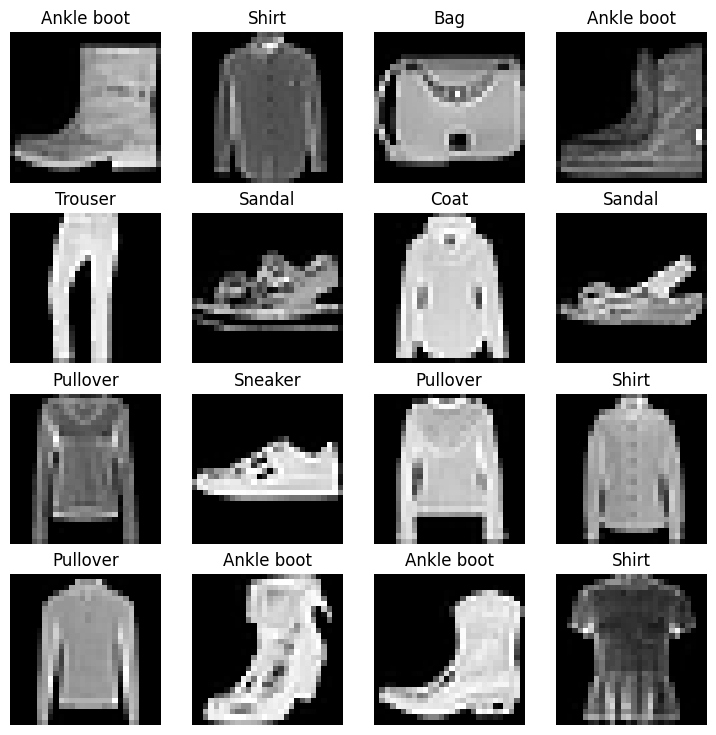

In [12]:
# Plot more images
torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,rows*cols+1):
  random_idx=torch.randint(0,len(train_data),size=[1]).item() # size=[1] -- > returns a tensors of size 1 and item --> tensor -> integer
  image,label=train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(image.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)


Do you think these items of clothing (images) could be modelled with pure linear lines? Or do you think we'll need non-linearities?

In [13]:
train_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

# 2. Prepare DataLoader
Right now, our data is in the form of PyTorch Datasets.

DataLoader turns our dataset into a Python iterable.

More specifically, we want to turn our data into batches (or mini-batches).

Why would we do this?

1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32).
2. It gives our neural network more chances to update its gradients per epoch.

For more on mini-batches, see here: https://youtu.be/l4lSUAcvHFs

In [14]:
from torch.utils.data import DataLoader

BATCH_SIZE=32

train_dataloader=DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader=DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f397760ad90>,
 <torch.utils.data.dataloader.DataLoader at 0x7f39776625d0>)

In [15]:
print(f"DataLoders : {train_dataloader,test_dataloader}")
print(f"Lenght of train dataloder : {len(train_dataloader)} of Batch size : {BATCH_SIZE}")
print(f"Lenght of test dataloder : {len(test_dataloader)} of Batch size : {BATCH_SIZE}")

DataLoders : (<torch.utils.data.dataloader.DataLoader object at 0x7f397760ad90>, <torch.utils.data.dataloader.DataLoader object at 0x7f39776625d0>)
Lenght of train dataloder : 1875 of Batch size : 32
Lenght of test dataloder : 313 of Batch size : 32


In [16]:
#  Check out whats inside the dataloaders
train_features_batch,train_labels_batch=next(iter(train_dataloader))
test_features_batch,test_labels_batch=next(iter(test_dataloader))
train_features_batch.shape,train_labels_batch.shape


(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image shape : torch.Size([1, 28, 28])
Label : 6 -> Shirt


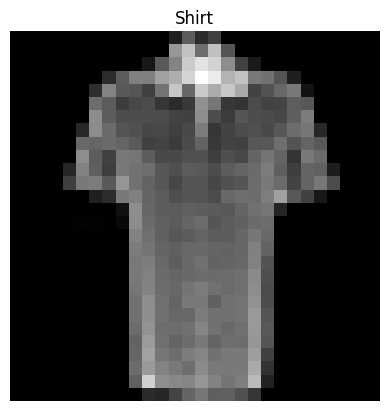

In [17]:
# Show the img
torch.manual_seed(42)
random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
img,label=train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image shape : {img.shape}")
print(f"Label : {label} -> {class_names[label]}")

# 3 Model 0: Build a basline model
When starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In other words: start simply and add complexity when necessary.

In [18]:
# Create a flatten layer
flatten_model=nn.Flatten()

# Create a single sample
x=train_features_batch[0]

# Flatten the sample
output= flatten_model(x)


#  Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [19]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape : int,
               hidden_units : int,
               output_shape : int):
    super().__init__()

    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=output_shape)
    )
  def forward(self,x):
    return self.layer_stack(x)

In [20]:
torch.manual_seed(42)

# Setup model with input parameters

model_0=FashionMNISTModelV0(
    input_shape=784, # 28*28
    hidden_units=10,
    output_shape=len(class_names)
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [21]:
x.shape

torch.Size([1, 28, 28])

In [22]:
dummy_x=torch.rand([1,1,28,28])
dummy_x.shape

torch.Size([1, 1, 28, 28])

In [23]:
output=model_0(dummy_x)
output.shape

torch.Size([1, 10])

In [24]:
output

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

# 6.1 Setup loss, optimizer and evaluation metrics

In [25]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import accuracy_fn


In [26]:
#  Set Loss func
loss_fn=nn.CrossEntropyLoss()

# optim
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.1)

In [27]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [28]:
with torch.inference_mode():
  y_logits=model_0(test_features_batch)
y_labels=torch.argmax(torch.softmax(y_logits,dim=1),dim=1)
print(torch.unique(y_labels))
print(y_labels.shape)


tensor([1, 2, 4, 6, 7])
torch.Size([32])


# 3.2 Creating a functions to time our experiments

Machine learning is experimental

Two main things yoy will often want to track are :
1. Model's performance (loss and accuracy)
2. How fast it runs

In [29]:
from timeit import default_timer as timer
def print_train_time(start : float,
                     end : float,
                     device : torch.device = None):
  """
  Prints differences between start and end Time
  """
  total_time=end-start
  print(f"Train time on {device} : {total_time:.3f} seconds")
  return total_time



In [30]:
start_time=timer()
# with torch.inference_mode():
#   y_logits=model_0(test_features_batch)
# y_labels=torch.argmax(torch.softmax(y_logits,dim=1),dim=1)
# print(torch.unique(y_labels))
# print(y_labels.shape)
end_time=timer()
print_train_time(start=start_time,end=end_time,device="cpu")


Train time on cpu : 0.000 seconds


4.996799998480128e-05

# 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs
2. Loop through training batches , perform training steps , calucate the train loss per batch
3. Loop through testing batches , perform testing steps , claculate the test loss and test acc per batch
4. Print out what's happening
5. Time it all (for fun)

In [31]:
# Import tqdm for progess bar
from tqdm.auto import tqdm

# Setup the seed and start the timer
torch.manual_seed(42)
train_start_time_cpu=timer()

# Set up the epoch
epochs=3

# Create Training and testing loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  # Training
  train_loss,train_acc=0,0
  # Add a loop to loop through training batches
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    # 1.Forward pass
    y_logit=model_0(X)

    # 2.Loss
    loss=loss_fn(y_logit,y)
    train_loss += loss
    acc=accuracy_fn(y_true=y,
                          y_pred=torch.argmax(y_logit,dim=1))
    train_acc  += acc

    # 3. optimizer zero
    optimizer.zero_grad()

    # 4. loss backward
    loss.backward()

    # 5. optimizer Step
    optimizer.step()

    # Print out what's happening
    if batch % 400 == 0 :
      print(f"Looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples")

  train_loss /= len(train_dataloader) # per batch
  train_acc /=len(train_dataloader)  # per batch

  # Testing
  test_loss,test_acc=0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      # 1.Forward pass
      test_logit=model_0(X_test)
      # 2.Loss and acc
      loss=loss_fn(test_logit,y_test)
      test_loss += loss

      acc=accuracy_fn(y_true=y_test,
                      y_pred=torch.argmax(test_logit,dim=1))
      test_acc +=acc

    # Loss and acc of testing per batch
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  # Print out what's happening
  print(f"\nTrain loss : {train_loss:.4f} Train acc : {train_acc:.2f}% | Test loss : {test_loss:.4f} Test acc : {test_acc:.2f}%")

# Calculate the training time
train_end_time_cpu =timer()
total_train_time_model_0=print_train_time(start=train_start_time_cpu,
                                          end=train_end_time_cpu,
                                          device=str(next(model_0.parameters()).device))





  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train loss : 0.5904 Train acc : 79.17% | Test loss : 0.5095 Test acc : 82.04%
Epoch: 1
-------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train loss : 0.4763 Train acc : 83.32% | Test loss : 0.4799 Test acc : 83.20%
Epoch: 2
-------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train loss : 0.4550 Train acc : 84.05% | Test loss : 0.4766 Test acc : 83.43%
Train time on cpu : 24.385 seconds


# Make Predictions and get model 0 results


In [32]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [33]:
torch.manual_seed(42)

def eval_model(
    model : torch.nn.Module,
    data_loader : torch.utils.data.DataLoader,
    loss_fn : torch.nn.Module,
    accuracy_fn,
    device : torch.device = device):
  """
  Returns a dictionary containing results of model predicting on a data loader
  """
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      X=X.to(device)
      y=y.to(device)
      # Forward pass
      y_logit=model(X)
      # loss and acc
      loss +=loss_fn(y_logit,y)
      acc +=accuracy_fn(y_true=y,
                        y_pred=torch.argmax(y_logit,dim=1))
    # loss and acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {
      "model_name" : model.__class__.__name__,
      "model_loss" : loss.item(),
      "model_acc" : acc
  }


In [34]:
#  Test our model_0
model_0_results=eval_model(model=model_0,
           data_loader=test_dataloader,
           loss_fn=loss_fn,
           accuracy_fn=accuracy_fn,
                           device="cpu")
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

# 5. Setup device Agnostic-code (for using a GPU if there is one)

In [35]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# Model_1 with non linearity

In [36]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape : int,
               hidden_units : int,
               output_shape : int):
    super().__init__()

    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_shape),
        nn.ReLU()
    )
  def forward(self,x):
    return self.layer_stack(x)

In [37]:
model_1=FashionMNISTModelV1(
    input_shape=784, # 28*28
    hidden_units=100,
    output_shape=len(class_names)
).to(device)

In [38]:
model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=100, bias=True)
    (2): ReLU()
    (3): Linear(in_features=100, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [39]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [40]:
#  Set Loss func
loss_fn=nn.CrossEntropyLoss()

# optim
optimizer=torch.optim.SGD(params=model_1.parameters(),
                          lr=0.1)

In [41]:
# Import tqdm for progess bar
from tqdm.auto import tqdm

# Setup the seed and start the timer
torch.manual_seed(42)
train_start_time_cpu=timer()

# Set up the epoch
epochs=3


# Create Training and testing loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  # Training
  train_loss,train_acc=0,0
  # Add a loop to loop through training batches
  for batch, (X,y) in enumerate(train_dataloader):
    X=X.to(device)
    y=y.to(device)
    model_0.train()
    # 1.Forward pass
    y_logit=model_1(X)

    # 2.Loss
    loss=loss_fn(y_logit,y)
    train_loss += loss
    acc=accuracy_fn(y_true=y,
                          y_pred=torch.argmax(y_logit,dim=1))
    train_acc  += acc

    # 3. optimizer zero
    optimizer.zero_grad()

    # 4. loss backward
    loss.backward()

    # 5. optimizer Step
    optimizer.step()

    # Print out what's happening
    if batch % 400 == 0 :
      print(f"Looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples")

  train_loss /= len(train_dataloader) # per batch
  train_acc /=len(train_dataloader)  # per batch

  # Testing
  test_loss,test_acc=0,0
  model_1.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      X_test=X_test.to(device)
      y_test=y_test.to(device)
      # 1.Forward pass
      test_logit=model_1(X_test)
      # 2.Loss and acc
      loss=loss_fn(test_logit,y_test)
      test_loss += loss

      acc=accuracy_fn(y_true=y_test,
                      y_pred=torch.argmax(test_logit,dim=1))
      test_acc +=acc

    # Loss and acc of testing per batch
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  # Print out what's happening
  print(f"\nTrain loss : {train_loss:.4f} Train acc : {train_acc:.2f}% | Test loss : {test_loss:.4f} Test acc : {test_acc:.2f}%")

# Calculate the training time
train_end_time_cpu =timer()
total_train_time_model_1=print_train_time(start=train_start_time_cpu,
                                          end=train_end_time_cpu,
                                          device=str(next(model_1.parameters()).device))





  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train loss : 0.8547 Train acc : 72.80% | Test loss : 0.6631 Test acc : 77.84%
Epoch: 1
-------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train loss : 0.5367 Train acc : 81.36% | Test loss : 0.4279 Test acc : 84.64%
Epoch: 2
-------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train loss : 0.3857 Train acc : 86.19% | Test loss : 0.4053 Test acc : 85.47%
Train time on cuda:0 : 27.576 seconds


In [42]:
model_1_results=eval_model(
    model=model_1,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.4053462743759155,
 'model_acc': 85.47324281150159}

# Create function for training and test loop
* train_step()
* test_step()

In [43]:
def train_step(model : torch.nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               optimizer : torch.optim.Optimizer,
               accuracy_fn,
               device : torch.device = device):
  # Training
  train_loss,train_acc=0,0
  # Add a loop to loop through training batches
  for batch, (X,y) in enumerate(data_loader):
    X=X.to(device)
    y=y.to(device)
    model.train()
    # 1.Forward pass
    y_logit=model(X)

    # 2.Loss
    loss=loss_fn(y_logit,y)
    train_loss += loss
    acc=accuracy_fn(y_true=y,
                          y_pred=torch.argmax(y_logit,dim=1))
    train_acc  += acc

    # 3. optimizer zero
    optimizer.zero_grad()

    # 4. loss backward
    loss.backward()

    # 5. optimizer Step
    optimizer.step()

  train_loss /= len(data_loader) # per batch
  train_acc /=len(data_loader)  # per batch
  print(f"Train loss : {train_loss:.5f} | Train acc : {train_acc:.2f}%")



In [44]:
# Testing loop
def test_step(model : torch.nn.Module,
              data_loader : torch.utils.data.DataLoader,
              loss_fn : torch.nn.Module,
              accuracy_fn,
              device : torch.device = device):
  test_loss,test_acc=0,0
  model.eval()
  with torch.inference_mode():
    for X_test,y_test in data_loader :
      X_test=X_test.to(device)
      y_test=y_test.to(device)
      # 1.Forward pass
      test_logit=model(X_test)
      # 2.Loss and acc
      loss=loss_fn(test_logit,y_test)
      test_loss += loss

      acc=accuracy_fn(y_true=y_test,
                      y_pred=torch.argmax(test_logit,dim=1))
      test_acc +=acc

    # Loss and acc of testing per batch
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

    # Print out what's happening
    print(f" Test loss : {test_loss:.4f} Test acc : {test_acc:.2f}%")



In [45]:
from timeit import default_timer as timer


torch.manual_seed(42)
torch.cuda.manual_seed(42)

# start timer
train_start_time_gpu=timer()

# set epochs
epochs=3

for epoch in tqdm(range(epochs)):
  print(f"Epoch : {epoch} \n -------------")
  # Training loop
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  # Testing loop
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_end_time_gpu=timer()

total_train_time_model_1=print_train_time(start=train_start_time_gpu,
                 end=train_end_time_gpu,
                 device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0 
 -------------
Train loss : 0.35514 | Train acc : 87.24%
 Test loss : 0.3813 Test acc : 86.32%
Epoch : 1 
 -------------
Train loss : 0.33480 | Train acc : 87.76%
 Test loss : 0.3678 Test acc : 86.77%
Epoch : 2 
 -------------
Train loss : 0.31928 | Train acc : 88.34%
 Test loss : 0.3613 Test acc : 86.93%
Train time on cuda : 26.763 seconds


In [46]:
model_1_results=eval_model(model=model_1,
           data_loader=test_dataloader,
           loss_fn=loss_fn,
           accuracy_fn=accuracy_fn,
           device=device)

  0%|          | 0/313 [00:00<?, ?it/s]

In [47]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.36134225130081177,
 'model_acc': 86.93091054313099}

In [48]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

In [49]:
total_train_time_model_0

24.38546157099995

In [50]:
total_train_time_model_1

26.763046310999925

# Model 2: Building a Convolutional Neural Network (CNN)
CNN's are also known ConvNets.

CNN's are known for their capabilities to find patterns in visual data.

To find out what's happening inside a CNN, see this website: https://poloclub.github.io/cnn-explainer/

In [51]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  def __init__(self,input_shape : int,
               hidden_units : int,
               output_shape : int):
    super().__init__()

    self.conv_block_1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units * 7*7 , # age update karegae sabar rakho
                  out_features=output_shape)
    )

  def forward(self,x):
    x=self.conv_block_1(x)
    # print(f"Shape in Conv2d block1 {x.shape}")
    x=self.conv_block_2(x)
    # print(f"Shape in Conv2d block2 {x.shape}")
    x=self.classifier(x)
    # print(f"Shape in output layer {x.shape}")
    return x

In [52]:
model_2=FashionMNISTModelV2(
    input_shape=1,# black and white image hai apna
    hidden_units=10,
    output_shape=len(class_names)
).to(device)
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

# 7.1 Stepping through `nn.Conv2d()`

In [53]:
torch.manual_seed(42)

# Create a batch of images
images=torch.randn(size=(32,3,64,64))
test_image=images[0]

print(f"Image batch shape : {images.shape}")
print(f"Single image shape : {test_image.shape}")
print(f"Test image : {test_image}")

Image batch shape : torch.Size([32, 3, 64, 64])
Single image shape : torch.Size([3, 64, 64])
Test image : tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[

In [54]:
# Create a single conv2d layer
conv2d_layer= nn.Conv2d(in_channels=3,
                        out_channels=10,
                        kernel_size=3,
                        stride=1,
                        padding=0)
# Pass through the conv2d layer
conv2d_output=conv2d_layer(test_image.unsqueeze(0))
conv2d_output.shape

torch.Size([1, 10, 62, 62])

In [55]:
print(f"Shape of test image without unsqueeze : {test_image.shape}")
print(f"Shape of test image with unsqueeze : {test_image.unsqueeze(0).shape}")

# Create a max_pool layer
max_pool_layer=nn.MaxPool2d(kernel_size=2)

# Pass the data through conv2d layer
test_image_through_conv2d=conv2d_layer(test_image.unsqueeze(0))
test_image_through_conv2d_and_maxpool=max_pool_layer(test_image_through_conv2d)

print(f"Shape of test image Pass the data through conv2d layer : {test_image_through_conv2d.shape}")
print(f"Shape of test image Pass the data through conv2d layer and max pool : {test_image_through_conv2d_and_maxpool.shape}")


Shape of test image without unsqueeze : torch.Size([3, 64, 64])
Shape of test image with unsqueeze : torch.Size([1, 3, 64, 64])
Shape of test image Pass the data through conv2d layer : torch.Size([1, 10, 62, 62])
Shape of test image Pass the data through conv2d layer and max pool : torch.Size([1, 10, 31, 31])


In [56]:
torch.manual_seed(42)
# Create a random tensor of size 1,1,2,2
random_tensor=torch.randn(size=(1,1,2,2))
print(random_tensor)

random_tensor_max_pool=max_pool_layer(random_tensor)
print(f"Shape of random_tensor when pass through max pool layer : {random_tensor_max_pool.shape}")
print(f"Value of random_tensor when pass through max pool layer : {random_tensor_max_pool}")


tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Shape of random_tensor when pass through max pool layer : torch.Size([1, 1, 1, 1])
Value of random_tensor when pass through max pool layer : tensor([[[[0.3367]]]])


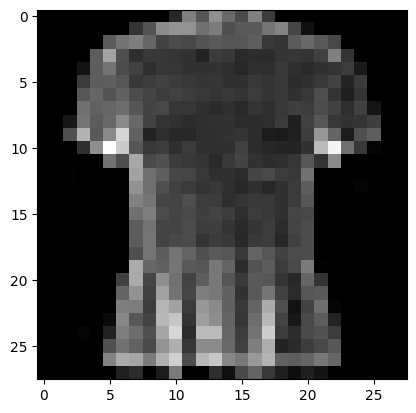

In [57]:
plt.imshow(image.squeeze(),cmap="gray");

In [58]:
image.shape

torch.Size([1, 28, 28])

In [59]:
# create a random tensor of same size
random_tensor=torch.randn(size=(1,28,28))
random_tensor.shape

torch.Size([1, 28, 28])

In [60]:
random_result=model_2(random_tensor.unsqueeze(0).to(device))
random_result

tensor([[-0.0089,  0.0007, -0.0093,  0.0530,  0.1417,  0.0549, -0.0636,  0.0383,
         -0.0140,  0.0576]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [61]:
image_data=model_2(image.unsqueeze(0).to(device))

In [62]:
image_data.shape

torch.Size([1, 10])

# as per new version of PyTorch unsqueeze(0) ki jarurat nahi hai (BUT HUM USE KARGAE COZS NAHI KIYA TOOH 1,10 output nahi ayega)
# so basically when passing data in (1,28,28) batch size nahi hai , so add batchsize dimension by unsequeeze(0)

In [163]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  def __init__(self,input_shape : int,
               hidden_units : int,
               output_shape : int):
    super().__init__()

    self.conv_block_1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7 , # age update karegae sabar rakho
                  out_features=output_shape)
    )

  def forward(self,x):
    x=self.conv_block_1(x)
    print(f"Shape in Conv2d block1 {x.shape}")
    x=self.conv_block_2(x)
    print(f"Shape in Conv2d block2 {x.shape}")
    x=self.classifier(x)
    print(f"Shape in output layer {x.shape}")
    return x

In [164]:
model_demo=FashionMNISTModelV2(
    input_shape=1,# black and white image hai apna
    hidden_units=10,
    output_shape=len(class_names)
).to(device)
model_demo

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [165]:
image_data=model_demo(image.unsqueeze(0).to(device))
image_data.shape

Shape in Conv2d block1 torch.Size([1, 10, 14, 14])
Shape in Conv2d block2 torch.Size([1, 10, 7, 7])
Shape in output layer torch.Size([1, 10])


torch.Size([1, 10])

In [166]:
image_data

tensor([[ 0.0488, -0.0244,  0.0357, -0.0114, -0.0136, -0.0337,  0.0041, -0.0324,
         -0.0269,  0.0164]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [167]:
image.shape

torch.Size([1, 28, 28])

# Setup the optimizer and Loss Function for model_2

In [168]:
from helper_functions import accuracy_fn

# Loss
loss_fn=nn.CrossEntropyLoss()

# Optimizer
optimizer=torch.optim.SGD(params=model_2.parameters(),
                          lr=0.01)


In [169]:
# Lets train the model_2
from timeit import default_timer as timer
from tqdm.auto import tqdm

torch.manual_seed(42)
torch.cuda.manual_seed(42)

train_start_time_gpu=timer()
# Setup the epoch
epochs=10

for epoch in tqdm(range(epochs)):
  print(f"\nEpoch : {epoch} --------------")
  # Train
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  # Test
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_end_time_gpu=timer()

total_train_time_model_2=print_train_time(start=train_start_time_gpu,
                                          end=train_end_time_gpu,
                                          device=device)





  0%|          | 0/10 [00:00<?, ?it/s]


Epoch : 0 --------------
Train loss : 0.23128 | Train acc : 91.64%
 Test loss : 0.2792 Test acc : 89.92%

Epoch : 1 --------------
Train loss : 0.22967 | Train acc : 91.71%
 Test loss : 0.2769 Test acc : 90.00%

Epoch : 2 --------------
Train loss : 0.22827 | Train acc : 91.83%
 Test loss : 0.2762 Test acc : 90.16%

Epoch : 3 --------------
Train loss : 0.22686 | Train acc : 91.83%
 Test loss : 0.2792 Test acc : 89.96%

Epoch : 4 --------------
Train loss : 0.22568 | Train acc : 91.83%
 Test loss : 0.2738 Test acc : 90.07%

Epoch : 5 --------------
Train loss : 0.22406 | Train acc : 91.90%
 Test loss : 0.2725 Test acc : 90.21%

Epoch : 6 --------------
Train loss : 0.22296 | Train acc : 92.00%
 Test loss : 0.2739 Test acc : 90.05%

Epoch : 7 --------------
Train loss : 0.22175 | Train acc : 91.98%
 Test loss : 0.2765 Test acc : 90.09%

Epoch : 8 --------------
Train loss : 0.22100 | Train acc : 92.04%
 Test loss : 0.2737 Test acc : 90.08%

Epoch : 9 --------------
Train loss : 0.21979

In [170]:
model_2_results=eval_model(model=model_2,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn,
                           device=device)
model_2_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.2740752100944519,
 'model_acc': 90.05591054313099}

In [171]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

In [172]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.36134225130081177,
 'model_acc': 86.93091054313099}

In [173]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.2740752100944519,
 'model_acc': 90.05591054313099}

# Compare model predictions and training time


In [174]:
import pandas as pd

compare_results=pd.DataFrame([model_0_results,
                              model_1_results,
                              model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.361342,86.930911
2,FashionMNISTModelV2,0.274075,90.055911


In [175]:
# Add training time
compare_results["Training Time"]=[total_train_time_model_0,
                                  total_train_time_model_1,
                                  total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,Training Time
0,FashionMNISTModelV0,0.476639,83.426518,24.385462
1,FashionMNISTModelV1,0.361342,86.930911,26.763046
2,FashionMNISTModelV2,0.274075,90.055911,114.172621


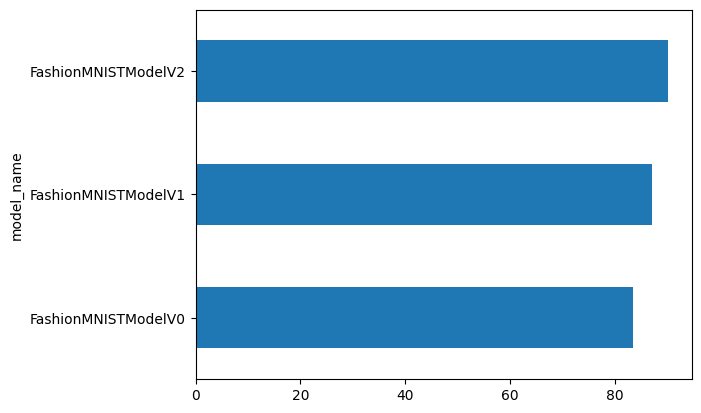

In [176]:
# Plot
compare_results.set_index("model_name")["model_acc"].plot(kind="barh");

# 9.Make and evaluate random predictions with best model


In [177]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [178]:
img,label=test_data[0]
img.shape, label

(torch.Size([1, 28, 28]), 9)

In [179]:
def make_predictions(model : torch.nn.Module,
                     data : list,
                     device : torch.device =device):
  pred_probs=[]
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample add a batch dimesions and pass through the target device
      sample=torch.unsqueeze(sample,dim=0).to(device)

      # Forward pass (model output raw logits)
      pred_logit=model(sample)

      # Get the prediction probability (logits -> pred prob ) {softmax}
      pred_prob=torch.softmax(pred_logit.squeeze(),dim=0)

      # Get pred prob off the gpu for further calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred probs to turn list to tensors
  return torch.stack(pred_probs)

In [180]:
import random
# random.seed(42)
test_samples=[]
test_labels=[]

for sample, label in  random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first image sample
test_samples[0].shape

torch.Size([1, 28, 28])

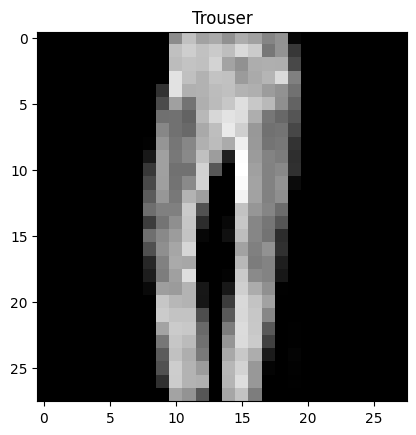

In [181]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_names[test_labels[0]]);

In [182]:
# Make prediction
pred_probs=make_predictions(model=model_2,
                            data=test_samples)

pred_probs.shape

torch.Size([9, 10])

In [183]:
pred_probs[:2]

tensor([[8.4779e-05, 9.9958e-01, 1.2245e-06, 6.3469e-05, 2.6741e-04, 2.6754e-07,
         2.0771e-06, 4.3393e-08, 1.0174e-07, 1.1604e-08],
        [9.8739e-01, 1.4709e-08, 3.9181e-04, 1.1962e-05, 6.8818e-06, 4.0930e-12,
         1.2195e-02, 7.6561e-09, 2.4437e-07, 3.2744e-10]])

In [184]:
# Pred probs -> pred labels
pred_labels=torch.argmax(pred_probs,dim=1)
pred_labels

tensor([1, 0, 0, 8, 1, 0, 7, 3, 0])

In [185]:
test_labels

[1, 0, 0, 8, 1, 6, 7, 3, 0]

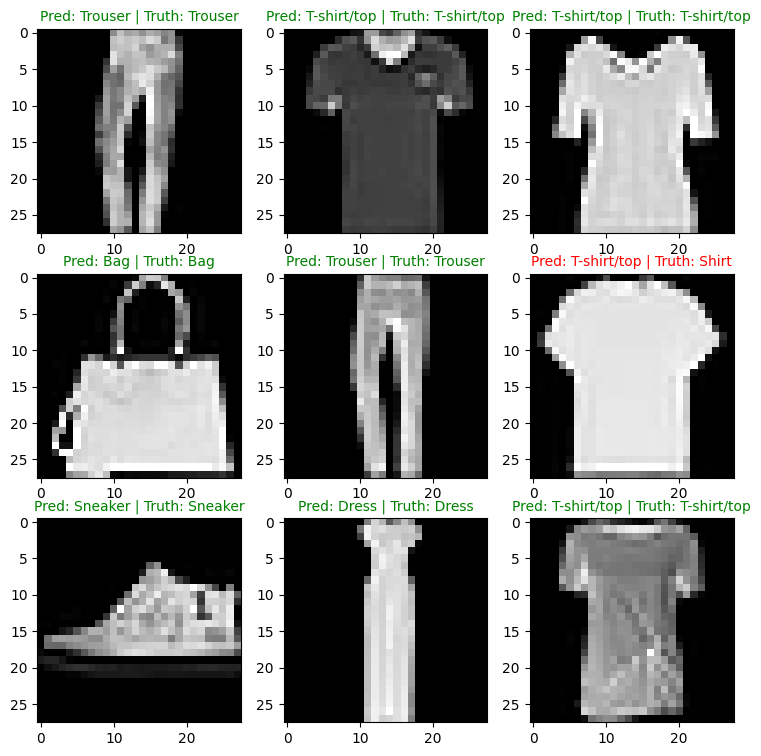

In [186]:
# Plot predictions
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i , sample in enumerate(test_samples):
  # Create the plot
  plt.subplot(nrows,ncols,i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(),cmap="gray")

  # Fint the prediction
  pred_label=class_names[pred_labels[i]]

  # Get truth label
  truth_label=class_names[test_labels[i]]

  # Create a title for the plot
  title_text=f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change colour of title text
  if pred_label==truth_label:
    plt.title(title_text,fontsize=10,c="g")
  else:
    plt.title(title_text,fontsize=10,c="r")


# 10. Making a confusion matrix for further prediction evaluation
A confusion matrix is a fantastic way of evaluating your classification models visually: https://www.learnpytorch.io/02_pytorch_classification/#9-more-classification-evaluation-metrics

Make predictions with our trained model on the test dataset
Make a confusion matrix torchmetrics.ConfusionMatrix - https://torchmetrics.readthedocs.io/en/stable/classification/confusion_matrix.html
Plot the confusion matrix using mlxtend.plotting.plot_confusion_matrix() - http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/

In [187]:
from tqdm.auto import tqdm

# Make prediction
y_preds=[]

model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader,desc="Making Prediction"):
    X,y=X.to(device),y.to(device)
    # Forward pass
    y_logit=model_2(X)
    y_pred=torch.argmax(y_logit,dim=1)
    y_preds.append(y_pred.cpu())

# Concatenate the list of predictions to a tensor
y_pred_tensor=torch.concat(y_preds)
y_pred_tensor[:10]

Making Prediction:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [188]:
len(y_preds) # Test batches size


313

In [189]:
len(y_pred_tensor)

10000

In [190]:
import mlxtend

In [191]:
mlxtend.__version__

'0.23.4'

In [192]:
# Install torchmetrics
!pip install torchmetrics

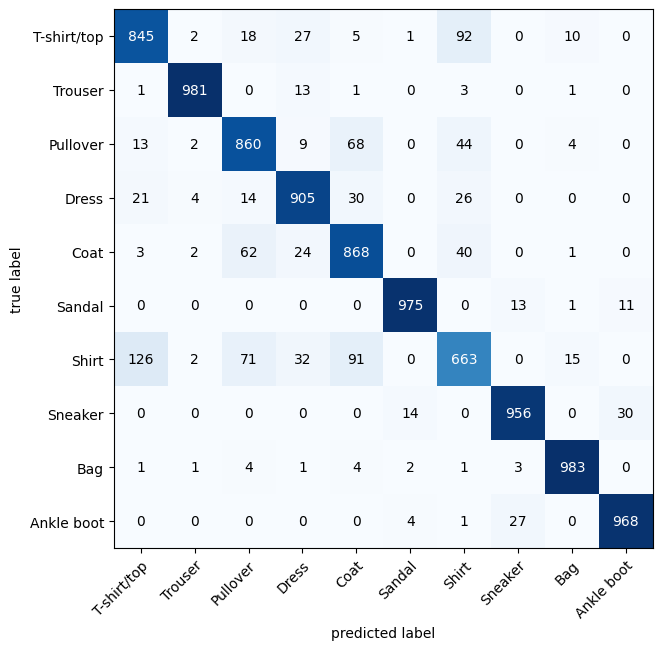

In [193]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Create instance of confusionMatrix
confmat=ConfusionMatrix(task= "multiclass", num_classes=len(class_names))
confmat_tensor=confmat(preds=y_pred_tensor,
                       target=test_data.targets)

# Plot
fig , ax= plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    figsize=(10,7),
    class_names=class_names
)

# Save and load

# We are saving GPu model and loading it on CPU

In [194]:
torch.save(obj=model_2.state_dict(),f="/content/drive/MyDrive/FashsionMNISIT_GPU_MODELV2/model_2.pth")

In [199]:
loaded_model_2_on_GPU=FashionMNISTModelV2(
    input_shape=1,# black and white image hai apna
    hidden_units=10,
    output_shape=len(class_names)
).cpu()
loaded_model_2_on_GPU.load_state_dict(torch.load(f="/content/drive/MyDrive/FashsionMNISIT_GPU_MODELV2/model_2.pth",weights_only=True,
                                                 map_location=torch.device("cpu")))

<All keys matched successfully>

In [200]:
# Make prediction
pred_probs=make_predictions(model=loaded_model_2_on_GPU,
                            data=test_samples)
pred_labels=torch.argmax(pred_probs,dim=1)
pred_labels[:10]

Shape in Conv2d block1 torch.Size([1, 10, 14, 14])
Shape in Conv2d block2 torch.Size([1, 10, 7, 7])
Shape in output layer torch.Size([1, 10])
Shape in Conv2d block1 torch.Size([1, 10, 14, 14])
Shape in Conv2d block2 torch.Size([1, 10, 7, 7])
Shape in output layer torch.Size([1, 10])
Shape in Conv2d block1 torch.Size([1, 10, 14, 14])
Shape in Conv2d block2 torch.Size([1, 10, 7, 7])
Shape in output layer torch.Size([1, 10])
Shape in Conv2d block1 torch.Size([1, 10, 14, 14])
Shape in Conv2d block2 torch.Size([1, 10, 7, 7])
Shape in output layer torch.Size([1, 10])
Shape in Conv2d block1 torch.Size([1, 10, 14, 14])
Shape in Conv2d block2 torch.Size([1, 10, 7, 7])
Shape in output layer torch.Size([1, 10])
Shape in Conv2d block1 torch.Size([1, 10, 14, 14])
Shape in Conv2d block2 torch.Size([1, 10, 7, 7])
Shape in output layer torch.Size([1, 10])
Shape in Conv2d block1 torch.Size([1, 10, 14, 14])
Shape in Conv2d block2 torch.Size([1, 10, 7, 7])
Shape in output layer torch.Size([1, 10])
Shape 

tensor([1, 0, 0, 8, 1, 0, 7, 3, 0])

In [201]:
len(pred_labels)

9

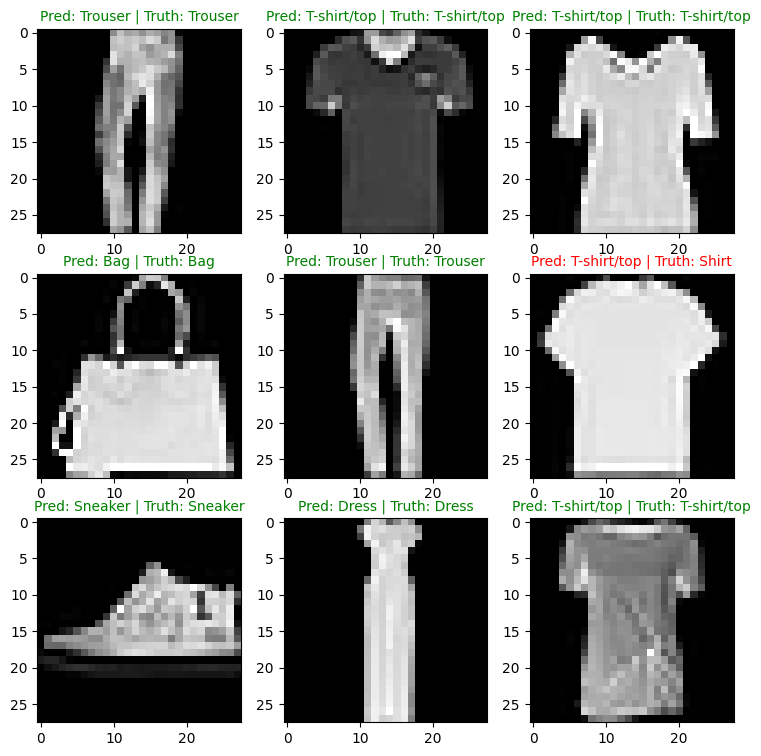

In [202]:
# Plot predictions
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i , sample in enumerate(test_samples):
  # Create the plot
  plt.subplot(nrows,ncols,i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(),cmap="gray")

  # Fint the prediction
  pred_label=class_names[pred_labels[i]]

  # Get truth label
  truth_label=class_names[test_labels[i]]

  # Create a title for the plot
  title_text=f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change colour of title text
  if pred_label==truth_label:
    plt.title(title_text,fontsize=10,c="g")
  else:
    plt.title(title_text,fontsize=10,c="r")

In [203]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.2740752100944519,
 'model_acc': 90.05591054313099}

In [205]:
loaded_model_2_on_GPU_results=eval_model(
    model=loaded_model_2_on_GPU,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

  0%|          | 0/313 [00:00<?, ?it/s]

Shape in Conv2d block1 torch.Size([32, 10, 14, 14])
Shape in Conv2d block2 torch.Size([32, 10, 7, 7])
Shape in output layer torch.Size([32, 10])
Shape in Conv2d block1 torch.Size([32, 10, 14, 14])
Shape in Conv2d block2 torch.Size([32, 10, 7, 7])
Shape in output layer torch.Size([32, 10])
Shape in Conv2d block1 torch.Size([32, 10, 14, 14])
Shape in Conv2d block2 torch.Size([32, 10, 7, 7])
Shape in output layer torch.Size([32, 10])
Shape in Conv2d block1 torch.Size([32, 10, 14, 14])
Shape in Conv2d block2 torch.Size([32, 10, 7, 7])
Shape in output layer torch.Size([32, 10])
Shape in Conv2d block1 torch.Size([32, 10, 14, 14])
Shape in Conv2d block2 torch.Size([32, 10, 7, 7])
Shape in output layer torch.Size([32, 10])
Shape in Conv2d block1 torch.Size([32, 10, 14, 14])
Shape in Conv2d block2 torch.Size([32, 10, 7, 7])
Shape in output layer torch.Size([32, 10])
Shape in Conv2d block1 torch.Size([32, 10, 14, 14])
Shape in Conv2d block2 torch.Size([32, 10, 7, 7])
Shape in output layer torch.

In [206]:
loaded_model_2_on_GPU_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.2740752100944519,
 'model_acc': 90.05591054313099}

In [207]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.2740752100944519,
 'model_acc': 90.05591054313099}